# Home work


## Data

Investigate the dataset (*house_data.csv* file). 

Split data by using scikit-learn method *train_test_split* (check the tips and additional links senction below) Train = 80%, test - 20% and random_state=49.

The following columns should be analysed:
    - date 
    - yr_renovated 
    - yr_built
    - lat
    - long
    - sqft_living
    - sqft_lot
    - sqft_above
    - sqft_basement
    

## Linear regression

Build the linear regression model that have the best score you can achieve. 
The model should predict the house price (price column in csv file).


## Logistic regression

Build the logistic regression model that have the best score you achieved. 
The model should predict the house grade (grade column in csv file).


## Evaluation

1. The code for data preprocessing of the specified columns above and your text explanation (comments or text cell in notebook) of your decision. For example, you represent the *date* column as integer (date in seconds format) and you should explain why you decided so.
2. Train linear regression model 
3. Visualize train and test mean squared error values
4. Train multiclass logistic regression model (one-vs-rest (OvR) scheme)
5. Visualize train and test accuracy values
6. Summary for both models.


## Submit
Two options for submition: via email or on [distedu.ukma.edu.ua](https://distedu.ukma.edu.ua/course/view.php?id=32)

You should submit jupyter notebook by Friday, October 19th till 6pm EEST timezone.



## Tips and additional links

Don't forget to split data. Train - 80% and test - 20%. You can use scikit-learn method [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

The links below are additional resources
More about [data exploration(investigation)](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic01_pandas_data_analysis/topic1_pandas_data_analysis.ipynb?flush_cache=true)

More about visualization [here](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true) and [here](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true)

[Sklearn OneVsOneClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html)

[LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

## Step#1 - Initialization, reading input

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn import linear_model
from sklearn import multiclass
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# I had to work in colab
import io
from google.colab import files
uploaded = files.upload()


Saving house_data.csv to house_data (3).csv


In [0]:
#and read files this way
temp_data = pd.read_csv(io.StringIO(uploaded['house_data.csv'].decode('utf-8')))
#not thia way
#temp_data= pd.read_csv("house_data.csv")

## Step#2 - Data Exploration

In [4]:
temp_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#checking for null entries - everything seems fine
temp_data.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [6]:
#checking data types - everything except data(object type) seems legit aswell
temp_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Data is pretty clean, only object field will need some improvements. For now, let's move to pairplot part:

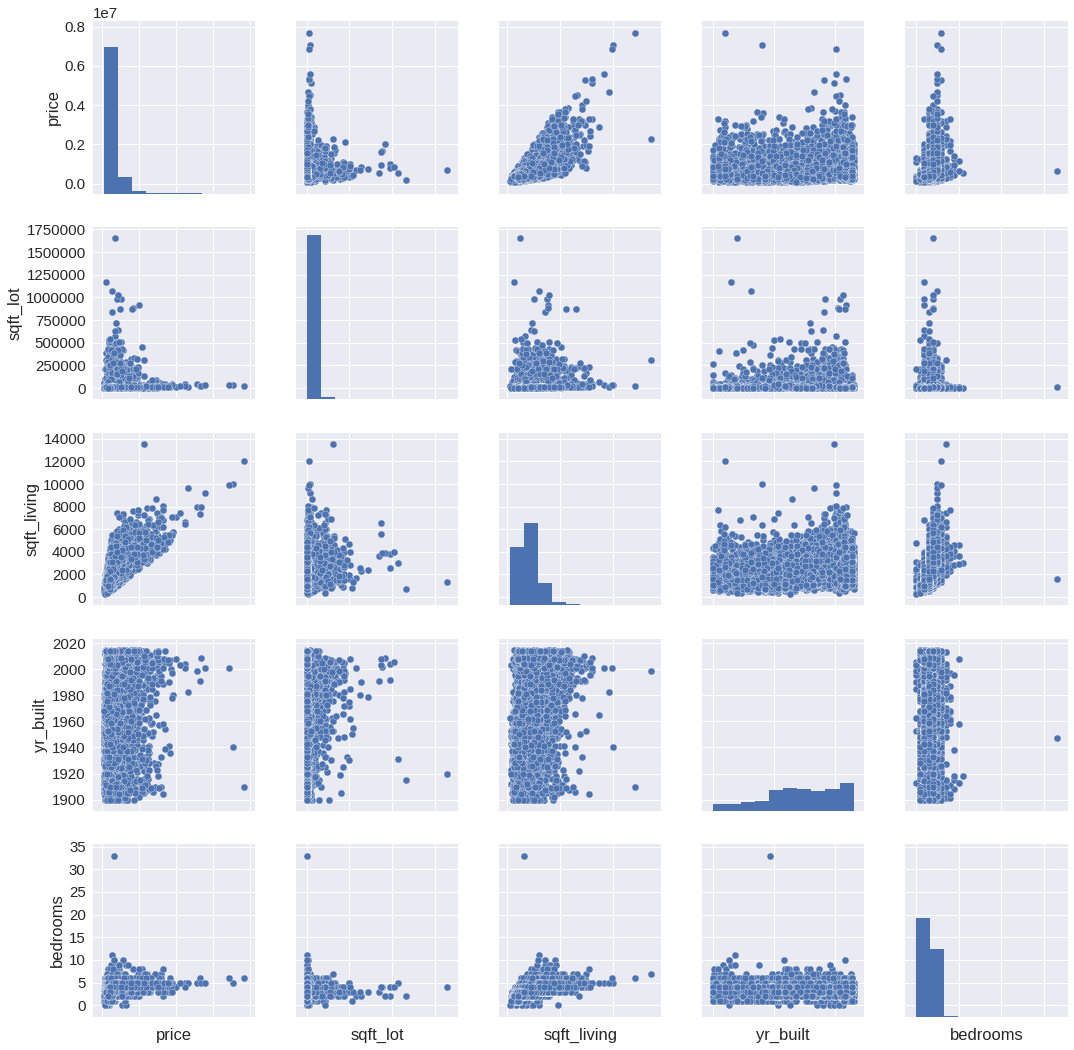

In [7]:
with sns.plotting_context("notebook",font_scale=1.5):
    graph = sns.pairplot(temp_data[['price','sqft_lot','sqft_living','yr_built','bedrooms']],palette='tab20',size=3)
graph.set(xticklabels=[])

Let's try using Pearson correlation heatmap:

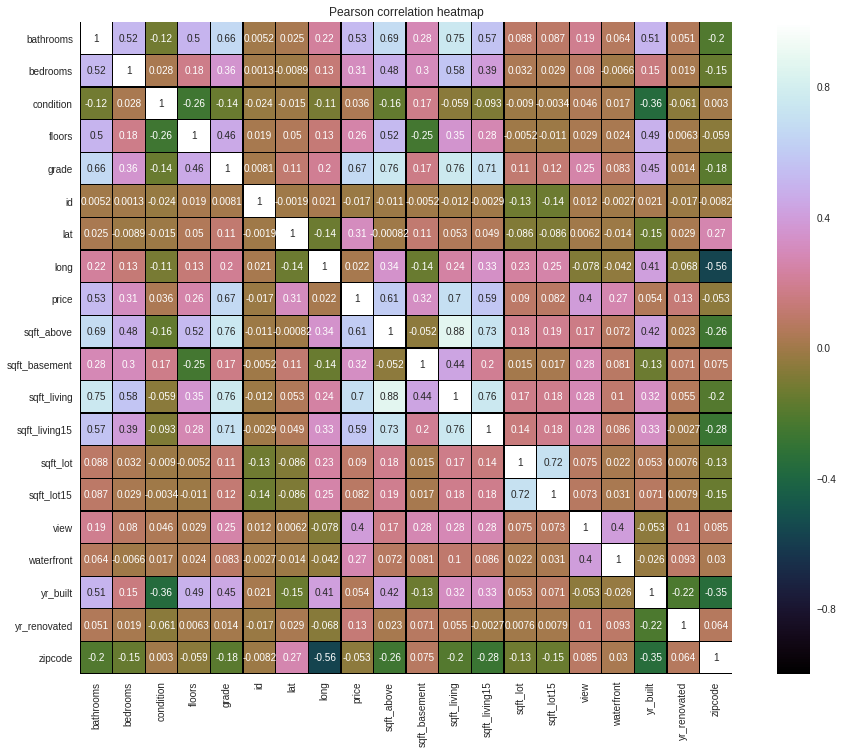

In [8]:
strings = []
for colname, colvalue in temp_data.iteritems():
    if type(colvalue[1])==str:
        strings.append(colname)

num = temp_data.columns.difference(strings)

house_num = temp_data[num]
f,ax = plt.subplots(figsize=(16,12))
plt.title("Pearson correlation heatmap")

sns.heatmap(house_num.astype(float).corr(),linewidth=0.3,vmax=1.0,square=True,cmap='cubehelix',linecolor='k',annot=True)

price mostly depends on: grade(0.67),sqft_above(0.61),sqft_living(0.7).<br> 
interestingly, sqft_lot and sqft_lot15 are dependent only by 0.76<br> 
let's explore relations between these columns via pairplot

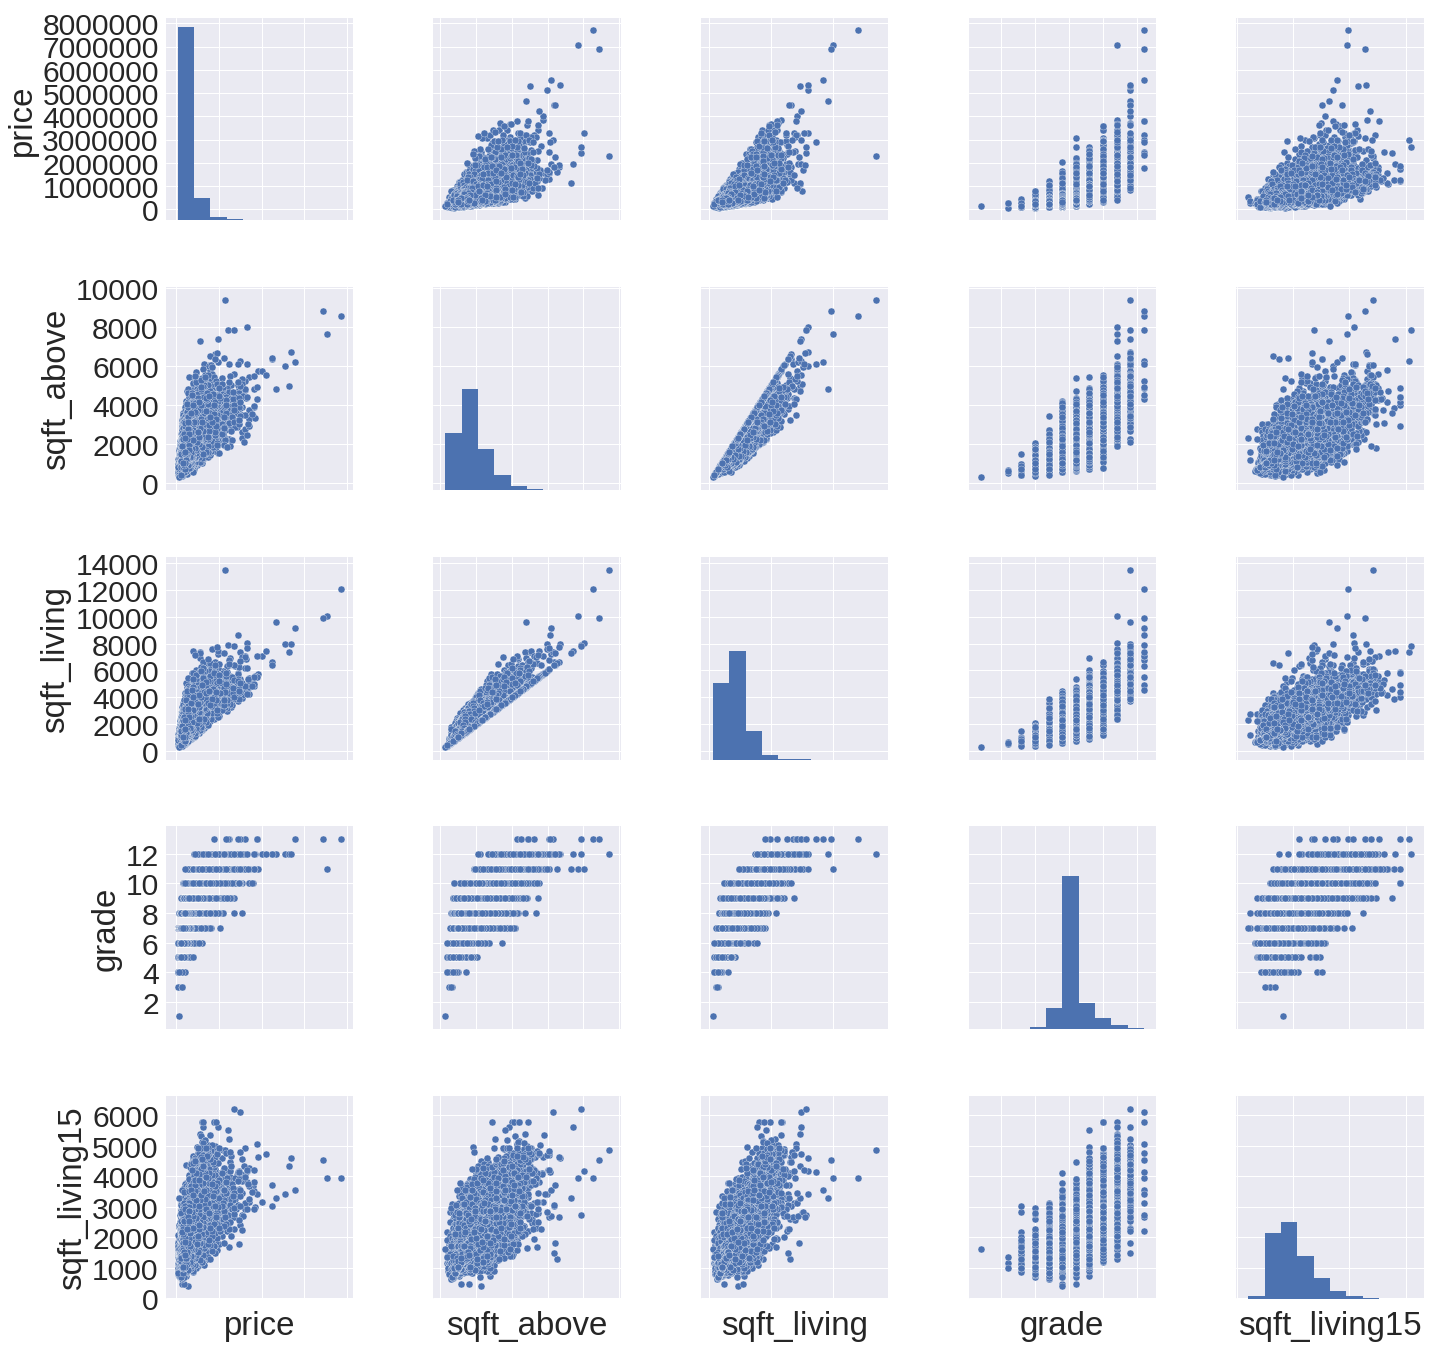

In [9]:
with sns.plotting_context("notebook",font_scale=3):
    graph = sns.pairplot(temp_data[['price','sqft_above','sqft_living','grade','sqft_living15']],palette='tab20',size=4)
graph.set(xticklabels=[])

The following columns should be analysed:

- date 
- yr_renovated 
- yr_built
- lat
- long
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement

*   Date can be transferred into DateTime object, to build a model, describing price change of a certain area with time
*   yr_built can be "normalized" (i.e. 2010->2018-2010=8)
*   yr_renovated can be treated the same. Those not renovated will be changed to -1
*   using yr_renovated we may create a boolean feature "renovated" (1 if house was renovated, 0 otherwise)
*   (lat,long) may be changed into a single variable and explored via some geo library or connected with zipcodes
*   from sqft_living, sqft_above, sqft_basement may be synthesized a new feature (theoretically has to be equal to sqft_lot)



### Feature engineering:
We are going to perform certain operations:
<p>1.converting date (Example: '20120410T000000'->'2012-04-10') - to get rid of an object column and be able to use it as a feature later</p> 
2.yr_built=abs(yr_built-2018) - sort of normalization<br>
3.yr_renovated=abs(yr_renovated-2018) - same as yr_built <br>
4.sqft_total = sqft_above + sqft_basement + sqft_living - first generated feature<br>

In [0]:
#converting date to datetime object
def changeDate(date):
    return pd.to_datetime(date.split('T')[0],format = '%Y%m%d').strftime(format='%Y-%m-%d')
#generating total area from a list of separate areas
def totalArea(listOfAreas):
    return sum(listOfAreas)

In [0]:
#"standartizing" a dataset - function is created for reusability reasons
def generate_data(temp_data):
    #creating a copy to keep input object unchanged
    res = temp_data.copy()
    
    res.date = res.date.apply(changeDate)
    res.yr_built = abs(res.yr_built-2018)
    res.yr_renovated = res.yr_renovated.apply(lambda x: abs(x-2018) if x!=0 else -1)
    
    return res

In [12]:
#let's get a "standartized" dataset
data = generate_data(temp_data)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,63,-1,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,67,27,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,85,-1,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,53,-1,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,31,-1,98074,47.6168,-122.045,1800,7503


## Part 3: Building linear regression models 

### Splitting the data:

In [0]:
train_X,test_X,train_Y,test_Y = model_selection.train_test_split(data,data["price"],test_size=0.2)


## Simple LR model:

In [0]:
#model relies on a score table "results"
def simple_linear_regression_model(train_X,test_X,train_Y,test_Y,feature):
    lr = linear_model.LinearRegression()

    X_train,Y_train = train_X[feature].values.reshape(-1,1), train_Y.values
    X_test,Y_test = test_X[feature].values.reshape(-1,1), np.array(test_Y,dtype=pd.Series)

    lr.fit(X_train,Y_train)
    
    pred = lr.predict(X_test)
    #mse and score will be stored locally
    mse,test_score,train_score = np.sqrt(metrics.mean_squared_error(Y_test,pred)),lr.score(X_test,Y_test),lr.score(X_train,Y_train)
    #mse and score will be added to the score table
    results.loc[feature] = (mse,test_score,train_score)

-for the sake of curiosity, we'll begin with building various simple linear regression models with each feature as a separate parameter<br>
-'date','id' and 'price' will be omitted<br>
-from the previously built correlation heatmap and pairplot graphs, we should expect models based on 'grade','sqft_above','sqft_living' to perform better than the others

In [0]:
#object to easily store list of features
used_data = data.drop(['id','date','price'],axis = 1)

In [16]:
#future results columns
results = pd.DataFrame(columns = ['mse','test_score','train_score'])

features = used_data.columns.values
for feature in features:
    simple_linear_regression_model(train_X,test_X,train_Y,test_Y,feature)
results.sort_values(['test_score','train_score','mse'],ascending=[0,0,0])

,mse,test_score,train_score
sqft_living,259156.519167,0.509086,0.488705
grade,276623.176023,0.440682,0.446674
sqft_above,289123.977845,0.388988,0.361015
sqft_living15,295831.524206,0.360309,0.338151
bathrooms,307340.469886,0.309568,0.267072
view,340046.518176,0.154803,0.158592
bedrooms,349054.482699,0.109431,0.091326
sqft_basement,351930.566625,0.094694,0.107423
lat,353646.926773,0.085842,0.096367
floors,355399.227120,0.076761,0.063125


Interestingly, sqft_living got better result that sqft_living15, despite the fact that sqft_living15 is more assosiated with price. However, we undoubtedly have to build multiple LR, as our results are far from satisfying

## More complex model
Let's build a multiple linear regression with all the features (except 'date' and 'id) at once

In [0]:
def multiple_linear_regression(ind,train_X, test_X,train_Y,test_Y,features):
    lr = linear_model.LinearRegression()

    X_train,Y_train = train_X[features].values,train_Y.values
    X_test,Y_test = test_X[features].values,test_Y.values
    
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_test)
    
    #mse,score will be stored locally
    mse,test_score,train_score = np.sqrt(metrics.mean_squared_error(Y_test,pred)),lr.score(X_test,Y_test),lr.score(X_train,Y_train)
    #mse and score will be added to the score table
    results.loc[ind] = (mse,test_score,train_score)

In [0]:
#technical function
def run(ind,features):
    multiple_linear_regression(ind,train_X,test_X,train_Y,test_Y,features)
    print(results.sort_values(['test_score','train_score','mse'],ascending=[0,0,0]))

In [19]:
#used_data = data.drop(['id','date','price'],axis = 1)
#results = pd.DataFrame(columns = ['mse','score'])
features = used_data.columns.values
multiple_linear_regression('all features',train_X,test_X,train_Y,test_Y,features)
results.sort_values(['test_score','train_score','mse'],ascending=[0,0,0])

,mse,test_score,train_score
all features,201035.305886,0.704589,0.697803
sqft_living,259156.519167,0.509086,0.488705
grade,276623.176023,0.440682,0.446674
sqft_above,289123.977845,0.388988,0.361015
sqft_living15,295831.524206,0.360309,0.338151
bathrooms,307340.469886,0.309568,0.267072
view,340046.518176,0.154803,0.158592
bedrooms,349054.482699,0.109431,0.091326
sqft_basement,351930.566625,0.094694,0.107423
lat,353646.926773,0.085842,0.096367


We got 0.71 on test.Seems to be an improvement. We may try to run multiple LR with all combinations (18! = 6.4 * 10^15), but this seems extremely unreasonable <br>
Let's perform some experiments:<br>
1.Run multiple LR with 5 most important features<br>
2.Run multiple LR with 10 most important features<br>
3.Run multiple LR with 12 most important features<br>
4.Drop 3 least significant columns: 'sqft_lot', 'sqft_lot15', 'condition' (using 15 most important features)<br>


In [0]:
#list, constisted of features for each experiment
features_list = [
    ['sqft_living','grade','sqft_living15','sqft_above','bathrooms'],
    ['sqft_living','grade','sqft_living15','sqft_above','bathrooms','view','sqft_basement','lat','bedrooms','floors'],
    ['sqft_living','grade','sqft_living15','sqft_above','bathrooms','view','sqft_basement','lat','bedrooms','floors','waterfront','sqft_lot'],
    data.drop(['id','date','price','sqft_lot','sqft_lot15','condition'],axis = 1).columns.values]
ids_list = [
    '5 most important',
    '10 most important',
    '12 most important',
    'without 3 least significant'
           ]

In [21]:
#let's add them altogether
for i in range(len(features_list)):
    multiple_linear_regression(ids_list[i],train_X,test_X,train_Y,test_Y,features_list[i])
print(results.sort_values(['test_score','train_score','mse'],ascending=[0,0,0]))

                                       mse  test_score  train_score
all features                 201035.305886    0.704589     0.697803
without 3 least significant  201915.615659    0.701997     0.696153
12 most important            216126.072659    0.658575     0.657609
10 most important            219659.289413    0.647320     0.639167
5 most important             249071.244570    0.546551     0.543532
sqft_living                  259156.519167    0.509086     0.488705
grade                        276623.176023    0.440682     0.446674
sqft_above                   289123.977845    0.388988     0.361015
sqft_living15                295831.524206    0.360309     0.338151
bathrooms                    307340.469886    0.309568     0.267072
view                         340046.518176    0.154803     0.158592
bedrooms                     349054.482699    0.109431     0.091326
sqft_basement                351930.566625    0.094694     0.107423
lat                          353646.926773    0.

As we can see, the more features in the base model - the better. Simply cutting them doesn't help.<br> Let's take a look from another angle and add some features instead: before running polinomial model, we'll add to the dataset:<br>
1. three most important features squared
2. categorize categorizable: floors, view, condition, grade
3. add boolean features "renovated","with_basement",mentioned before<br>
Score and mse will be checked at each step

In [0]:
#new test function - to handle changing list of features
def test_with_new_features(ind):
    used_data = data.drop(['id','date','price'],axis = 1)
    features = used_data.columns.values
    multiple_linear_regression(ind,train_X,test_X,train_Y,test_Y,features)
    print(results.sort_values(['test_score','train_score','mse'],ascending=[0,0,0]))

In [0]:
# feature engineering #2
def add_significant_squared():
    data['sqft_living_squared'] = data.sqft_living.apply(lambda x: x**2)
    data['grade_squared'] = data.grade.apply(lambda x: x**2)
    data['sqft_above_squared'] = data.sqft_above.apply(lambda x: x**2)

In [24]:
#testing
add_significant_squared()
#splitting data
train_X,test_X,train_Y,test_Y = model_selection.train_test_split(data,data["price"],test_size=0.2)

#testing:
test_with_new_features('three main features squared')

                                       mse  test_score  train_score
three main features squared  190125.809374    0.720562     0.741853
all features                 201035.305886    0.704589     0.697803
without 3 least significant  201915.615659    0.701997     0.696153
12 most important            216126.072659    0.658575     0.657609
10 most important            219659.289413    0.647320     0.639167
5 most important             249071.244570    0.546551     0.543532
sqft_living                  259156.519167    0.509086     0.488705
grade                        276623.176023    0.440682     0.446674
sqft_above                   289123.977845    0.388988     0.361015
sqft_living15                295831.524206    0.360309     0.338151
bathrooms                    307340.469886    0.309568     0.267072
view                         340046.518176    0.154803     0.158592
bedrooms                     349054.482699    0.109431     0.091326
sqft_basement                351930.566625    0.

In [0]:
#categorizing features - function
def add_categorical_features(data):
    categorical_features = ['grade','floors','view','condition']
    for feature in categorical_features:
      dummies = pd.get_dummies(data[feature],drop_first=False)
      dummies = dummies.add_prefix("{}#".format(feature))
      data.drop(feature,axis=1,inplace=True)
      data = data.join(dummies)
      return data

In [26]:
#categorizing features - testing
data = add_categorical_features(data)
#splitting data once again
train_X,test_X,train_Y,test_Y = model_selection.train_test_split(data,data["price"],test_size=0.2)

test_with_new_features('dummies added')

                                       mse  test_score  train_score
dummies added                194163.270110    0.739914     0.738793
three main features squared  190125.809374    0.720562     0.741853
all features                 201035.305886    0.704589     0.697803
without 3 least significant  201915.615659    0.701997     0.696153
12 most important            216126.072659    0.658575     0.657609
10 most important            219659.289413    0.647320     0.639167
5 most important             249071.244570    0.546551     0.543532
sqft_living                  259156.519167    0.509086     0.488705
grade                        276623.176023    0.440682     0.446674
sqft_above                   289123.977845    0.388988     0.361015
sqft_living15                295831.524206    0.360309     0.338151
bathrooms                    307340.469886    0.309568     0.267072
view                         340046.518176    0.154803     0.158592
bedrooms                     349054.482699    0.

In [0]:
#boolean features
def add_boolean_features():
  data['renovated'] = data.yr_renovated.apply(lambda x: 1 if x>0 else 0)
  data['with_basement'] = data.sqft_basement.apply(lambda x: 1 if x>0 else 0)


In [28]:
#adding features
add_boolean_features()

#splitting data once again
train_X,test_X,train_Y,test_Y = model_selection.train_test_split(data,data["price"],test_size=0.2)

#testing
test_with_new_features('booleans added')

                                       mse  test_score  train_score
dummies added                194163.270110    0.739914     0.738793
booleans added               176625.970297    0.736239     0.743902
three main features squared  190125.809374    0.720562     0.741853
all features                 201035.305886    0.704589     0.697803
without 3 least significant  201915.615659    0.701997     0.696153
12 most important            216126.072659    0.658575     0.657609
10 most important            219659.289413    0.647320     0.639167
5 most important             249071.244570    0.546551     0.543532
sqft_living                  259156.519167    0.509086     0.488705
grade                        276623.176023    0.440682     0.446674
sqft_above                   289123.977845    0.388988     0.361015
sqft_living15                295831.524206    0.360309     0.338151
bathrooms                    307340.469886    0.309568     0.267072
view                         340046.518176    0.

as we see, adding booleans was a questionable idea. Both adding booleans and most significant features squared tend to improve train score, but reduction in a test score tells us it is tend to overfit the dataset

## Polynomial regression
Let's return to previous data, add categorical and boolean back and run a poly regression models with degrees 2 and 3 to see what happens


In [0]:
#for the sake of reusability, we'll create a function
def generate_data_extended(temp_data):
  data = generate_data(temp_data)
  data = add_categorical_features(data)
  add_boolean_features()
  return data

In [30]:
data = generate_data_extended(temp_data)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade#4,grade#5,grade#6,grade#7,grade#8,grade#9,grade#10,grade#11,grade#12,grade#13
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [0]:
def polynomial_linear_regression(ind,train_X,test_X,train_Y,test_Y,features,degree):
    poly_features = PolynomialFeatures(degree = degree)
    X_train_poly = poly_features.fit_transform(train_X[features].values)
    X_test_poly = poly_features.fit_transform(test_X[features].values)
    pr = linear_model.LinearRegression().fit(X_train_poly,train_Y)

    pred_poly = pr.predict(X_test_poly)
    #mse and score will be stored locally
    mse,test_score,train_score = np.sqrt(metrics.mean_squared_error(test_Y.values,pred_poly)),pr.score(X_test_poly,test_Y.values),pr.score(X_train_poly,train_Y.values)
    #mse and score will be added to the score table
    results.loc[ind] = (mse,test_score,train_score)

In [0]:
def test_with_poly_features(ind, degree = 2):
    used_data = data.drop(['id','date','price'],axis = 1)
    features = used_data.columns.values
    polynomial_linear_regression(ind,train_X,test_X,train_Y,test_Y,features,degree)

In [33]:
test_with_poly_features('poly_test_deg2',2)
test_with_poly_features('poly_test_deg3',3)
print(results.sort_values(['test_score','train_score','mse'],ascending=[0,0,0]))

                                      mse  test_score  train_score
dummies added                1.941633e+05    0.739914     0.738793
booleans added               1.766260e+05    0.736239     0.743902
three main features squared  1.901258e+05    0.720562     0.741853
all features                 2.010353e+05    0.704589     0.697803
without 3 least significant  2.019156e+05    0.701997     0.696153
12 most important            2.161261e+05    0.658575     0.657609
10 most important            2.196593e+05    0.647320     0.639167
5 most important             2.490712e+05    0.546551     0.543532
sqft_living                  2.591565e+05    0.509086     0.488705
grade                        2.766232e+05    0.440682     0.446674
sqft_above                   2.891240e+05    0.388988     0.361015
sqft_living15                2.958315e+05    0.360309     0.338151
bathrooms                    3.073405e+05    0.309568     0.267072
view                         3.400465e+05    0.154803     0.15

poly features seem to overfit the training set significantly

### Creating dummies from different zipcodes is a cheat which gives up to +0.15 improvement on train\test, but I'm not gonna use it because it isn't my idea

Let's move to logistic regression task:

## Logistic regression
We'll perform similar operatios:
1. Look at Pearson correlation heatmap to detect the most important features related to 'grade'
2. Try 'One-vs-All' approach
2. Build simple and multiple logistic regression models with different parameters
3. Perform additional feature engineering and trying to use polynomial models
4. Error analysis

In [0]:
#standartize data
data = generate_data(temp_data)
train_X,test_X,train_Y,test_Y = model_selection.train_test_split(data,data["grade"],test_size=0.2)


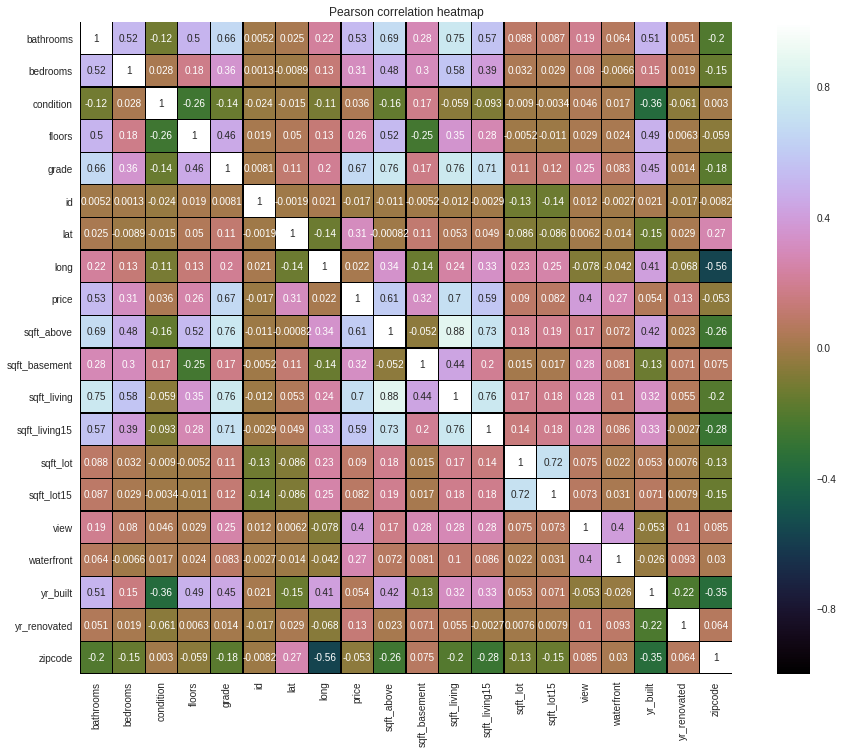

In [35]:
#person correlation heatmap
strings = []
for colname, colvalue in temp_data.iteritems():
    if type(colvalue[1])==str:
        strings.append(colname)

num = temp_data.columns.difference(strings)

house_num = temp_data[num]
f,ax = plt.subplots(figsize=(16,12))
plt.title("Pearson correlation heatmap")

sns.heatmap(house_num.astype(float).corr(),linewidth=0.25,vmax=1.0,square=True,cmap='cubehelix',linecolor='k',annot=True)

5 features with strongest connections are: 'sqft_above','sqft_living','sqft_living15','price','bathrooms'
For the sake of experiment we'll run simple logistic regression model with a single feature as an input data<br>
We'll use metrics.f1_score in results table

In [0]:
def simple_logistic_regression_model(train_X,train_Y,test_X,test_Y,feature):
    
    X_train,Y_train = train_X[feature].values.reshape(-1,1), train_Y.values
    X_test,Y_test = test_X[feature].values.reshape(-1,1), test_Y.values
    
    clf = linear_model.LogisticRegression(random_state=0,solver = 'liblinear',multi_class='ovr').fit(X_train,Y_train)
    pred = clf.predict(X_test)
    
    
    test_score = clf.score(X_test,Y_test)
    train_score = clf.score(X_train,Y_train)
    f1 = metrics.f1_score(Y_test,pred,average='weighted')  
  
    results_logistic.loc[feature] = (f1,train_score,test_score)
    
def multiple_logistic_regression_model(ind,train_X,train_Y,test_X,test_Y,features):
    
    X_train,Y_train =train_X[features].values , train_Y.values
    X_test,Y_test = test_X[features].values ,test_Y.values
    
    clf = linear_model.LogisticRegression(random_state=0, solver = 'lbfgs',multi_class='multinomial').fit(X_train,Y_train)
    
    pred = clf.predict(X_test)
    
    f1 = metrics.f1_score(Y_test,pred,average='weighted')
    test_score = clf.score(X_test,Y_test)
    train_score = clf.score(X_train,Y_train)
    
    results_logistic.loc[ind] = (f1,train_score,test_score)
    
    

In [37]:
results_logistic = pd.DataFrame(columns = ['f1_weighted','train_score','test_score'])

used_data = data.drop(['id','date','grade'],axis = 1)

features = used_data.columns.values
for feature in features:
    simple_logistic_regression_model(train_X,train_Y,test_X,test_Y,feature)
features = used_data.columns.values
multiple_logistic_regression_model("all features",train_X,train_Y,test_X,test_Y,features)
results_logistic.sort_values(['train_score','test_score'],ascending=[0,0])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,f1_weighted,train_score,test_score
sqft_living15,0.404071,0.486755,0.488781
all features,0.427690,0.485772,0.484848
sqft_above,0.400758,0.483864,0.487624
floors,0.403963,0.477386,0.486005
sqft_living,0.373507,0.468768,0.468887
yr_built,0.381776,0.459861,0.470275
bathrooms,0.330491,0.436032,0.442054
view,0.297046,0.423944,0.431645
waterfront,0.252048,0.415442,0.419847
sqft_basement,0.248266,0.414575,0.419616


Let's experiment with some features

In [0]:
features_list = [
    ['sqft_living15','sqft_above','floors','sqft_living','yr_built'],
    ['sqft_living15','sqft_above','floors','sqft_living','yr_built','bathrooms','view','waterfront','sqft_basement','price'],
    ['sqft_living15','sqft_above','floors','sqft_living','yr_built','bathrooms','view','waterfront','sqft_basement','price','yr_renovated','zipcode'],
    data.drop(['id','date','grade','sqft_lot15','bedrooms','condition'],axis = 1).columns.values]
ids_list = [
    '5 most important',
    '10 most important',
    '12 most important',
    'without 3 least significant'
           ]

In [39]:
for i in range(len(features_list)):
  multiple_logistic_regression_model(ids_list[i],train_X,train_Y,test_X,test_Y,features_list[i])
results_logistic.sort_values(['train_score','test_score'],ascending=[0,0])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,f1_weighted,train_score,test_score
5 most important,0.432826,0.499075,0.496183
12 most important,0.431835,0.488722,0.485311
without 3 least significant,0.428634,0.488086,0.483461
sqft_living15,0.404071,0.486755,0.488781
all features,0.427690,0.485772,0.484848
sqft_above,0.400758,0.483864,0.487624
floors,0.403963,0.477386,0.486005
sqft_living,0.373507,0.468768,0.468887
yr_built,0.381776,0.459861,0.470275
bathrooms,0.330491,0.436032,0.442054


Let's repeat our experiments using one-vs-rest scheme

In [0]:
def multiple_logistic_regression_model_ovr(ind,train_X,train_Y,test_X,test_Y,features):
    
    X_train,Y_train =train_X[features].values , train_Y.values
    X_test,Y_test = test_X[features].values ,test_Y.values
    
    clf = linear_model.LogisticRegression(random_state=0, solver = 'lbfgs',multi_class='ovr').fit(X_train,Y_train)
    
    pred = clf.predict(X_test)
    
    f1 = metrics.f1_score(Y_test,pred,average='weighted')
    test_score = clf.score(X_test,Y_test)
    train_score = clf.score(X_train,Y_train)
    
    results_logistic.loc[ind] = (f1,train_score,test_score)

In [42]:
multiple_logistic_regression_model_ovr("ovr all features",train_X,train_Y,test_X,test_Y,features)
results_logistic.sort_values(['train_score','test_score'],ascending=[0,0])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


,f1_weighted,train_score,test_score
ovr all features,0.450776,0.517640,0.522091
5 most important,0.432826,0.499075,0.496183
12 most important,0.431835,0.488722,0.485311
without 3 least significant,0.428634,0.488086,0.483461
sqft_living15,0.404071,0.486755,0.488781
all features,0.427690,0.485772,0.484848
sqft_above,0.400758,0.483864,0.487624
floors,0.403963,0.477386,0.486005
sqft_living,0.373507,0.468768,0.468887
yr_built,0.381776,0.459861,0.470275


In [0]:
ids_list_ovr = [
    'ovr 5 most important',
    'ovr 10 most important',
    'ovr 12 most important',
    'ovr without 3 least significant'
           ]

In [44]:
for i in range(len(features_list)):
  multiple_logistic_regression_model_ovr(ids_list_ovr[i],train_X,train_Y,test_X,test_Y,features_list[i])
results_logistic.sort_values(['train_score','test_score'],ascending=[0,0])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,f1_weighted,train_score,test_score
ovr 12 most important,0.472013,0.529034,0.533657
ovr 5 most important,0.475565,0.528398,0.535508
ovr without 3 least significant,0.464932,0.523077,0.528568
ovr all features,0.450776,0.517640,0.522091
ovr 10 most important,0.458211,0.510526,0.520703
5 most important,0.432826,0.499075,0.496183
12 most important,0.431835,0.488722,0.485311
without 3 least significant,0.428634,0.488086,0.483461
sqft_living15,0.404071,0.486755,0.488781
all features,0.427690,0.485772,0.484848


Let's add boolean features and most important features squared:

In [0]:
def test_with_new_features_logistic(ind):
  #splitting data once again
  train_X,test_X,train_Y,test_Y = model_selection.train_test_split(data,data["grade"],test_size=0.2)

  used_data = data.drop(['id','date','grade'],axis = 1)
  features = used_data.columns.values
  multiple_logistic_regression_model_ovr(ind,train_X,train_Y,test_X,test_Y,features)

In [0]:
def add_significant_squared_logistic():
    data['sqft_living15_squared'] = data.sqft_living15.apply(lambda x: x**2)
    data['floors_squared'] = data.floors.apply(lambda x: x**2)
    data['sqft_above_squared'] = data.sqft_above.apply(lambda x: x**2)
    data['sqft_living_squared'] = data.sqft_living.apply(lambda x: x**2)

In [47]:
add_significant_squared_logistic()
test_with_new_features_logistic('ovr significant squared')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
add_boolean_features()
test_with_new_features_logistic('boolean added')

results_logistic.sort_values(['train_score','test_score'],ascending=[0,0])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,f1_weighted,train_score,test_score
boolean added,0.482932,0.553730,0.544529
ovr 12 most important,0.472013,0.529034,0.533657
ovr 5 most important,0.475565,0.528398,0.535508
ovr without 3 least significant,0.464932,0.523077,0.528568
ovr all features,0.450776,0.517640,0.522091
ovr 10 most important,0.458211,0.510526,0.520703
ovr significant squared,0.419082,0.502892,0.503585
5 most important,0.432826,0.499075,0.496183
12 most important,0.431835,0.488722,0.485311
without 3 least significant,0.428634,0.488086,0.483461


Let's run a poly regression model with degrees of 2 and 3:


In [0]:
#restore "standard" dataset
data = generate_data(temp_data)
train_X,test_X,train_Y,test_Y = model_selection.train_test_split(data,data["grade"],test_size=0.2)


In [0]:
def multiple_logistic_regression_poly(ind, train_X,train_Y,test_X,test_Y,degree):
    poly_features = PolynomialFeatures(degree = degree)
    X_train_poly = poly_features.fit_transform(train_X[features].values)
    X_test_poly = poly_features.fit_transform(test_X[features].values)
    
    Y_train,Y_test = train_Y.values,test_Y.values
    clf = linear_model.LogisticRegression(random_state=0, solver = 'lbfgs',multi_class='ovr').fit(X_train_poly,Y_train)
    
    pred = clf.predict(X_test_poly)
    
    f1 = metrics.f1_score(test_Y.values,pred,average='weighted')
    test_score = clf.score(X_test_poly,Y_test)
    train_score = clf.score(X_train_poly,Y_train)
    
    results_logistic.loc[ind] = (f1,train_score,test_score)

In [51]:
multiple_logistic_regression_poly("poly_test2",train_X,train_Y,test_X,test_Y,2)
multiple_logistic_regression_poly("poly_test3",train_X,train_Y,test_X,test_Y,3)

results_logistic.sort_values(['train_score','test_score'],ascending=[0,0])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


,f1_weighted,train_score,test_score
boolean added,0.482932,0.553730,0.544529
ovr 12 most important,0.472013,0.529034,0.533657
ovr 5 most important,0.475565,0.528398,0.535508
ovr without 3 least significant,0.464932,0.523077,0.528568
ovr all features,0.450776,0.517640,0.522091
ovr 10 most important,0.458211,0.510526,0.520703
ovr significant squared,0.419082,0.502892,0.503585
5 most important,0.432826,0.499075,0.496183
12 most important,0.431835,0.488722,0.485311
without 3 least significant,0.428634,0.488086,0.483461


Adding poly features was at least useless
Logistic regression seems to work using one vs rest concept and a relatively small number of features (up to 8-10 most important ones)

## Results visualization


In [0]:
#poly_test_degx has a negative test score
results.drop(['poly_test_deg2','poly_test_deg3'],inplace=True)
results_logistic.drop(['poly_test2','poly_test3'],inplace=True)

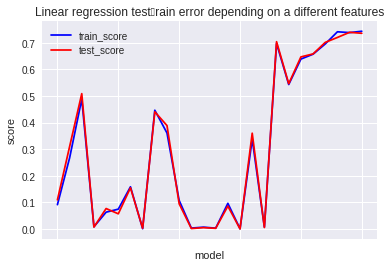

In [54]:
ax = plt.gca()
plt.title("Linear regression test\train error depending on a different features")
results.plot(kind='line',x=results.index,y = 'train_score', ax=ax, color='blue')
results.plot(kind ='line',x = results.index, y = 'test_score',ax = ax, color = 'red')
plt.xlabel("model")
plt.ylabel("score")
plt.show()

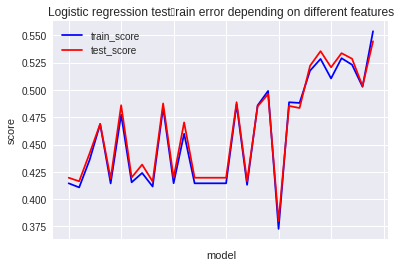

In [55]:
ax = plt.gca()
plt.title("Logistic regression test\train error depending on different features")
results_logistic.plot(kind='line',x=results_logistic.index,y = 'train_score', ax=ax, color='blue')
results_logistic.plot(kind ='line',x = results_logistic.index, y = 'test_score',ax = ax, color = 'red')
plt.xlabel("model")
plt.ylabel("score")
plt.show()


## Summary

### 1. Linear regression
  Using simple LR model I showed that a single feature cannot guarantee a sufficient result of price prediction. Using multiple LR is a much better idea, cautious feature selection, adding "dummies" together with creating additional "squared" features of the most important columns may improve a model all the way up to around 0.85 score (which is definitely overfitting). We've archieved around 0.75, which can still be improved.
  
### 2. Logistic regression
 Simple and Multiclass Logistic Regression models perform terribly. One vs Rest model isn't particularly good aswelll. Repeating same steps as in a price prediction problem doesn't help a lot. Poly regression is certainly harmful, and optimal Logistic Regression model should consist of approximately 8-10 features.
 
 ### General
 Anyway, I managed to archieve around 0.75 train\test score on LinearR and 0.55 on LogisticR.
 In both tasks I should try adding boolean features\dummies into models based on lesser number of standard features, aswell as to explore the dependency between train\test score, mse and number of features.
 
 #### Thanks for the attention!
 
 
 
Following notebook belongs to Alexandr Kroshyn. 